<a href="https://colab.research.google.com/github/Hariharasudhan27/Heart_Disease_Prediction-using-ML/blob/main/HCA_mini_project(Hari).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction using ML**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading csv file**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/HCA mini & Ass 2 dataset/Heart.csv")

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df.shape

(303, 15)

**Importing Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
df['Ca'].fillna(0.0)

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    0.0
Name: Ca, Length: 303, dtype: float64

In [ ]:
df=df.drop(columns=['Ca','Thal','Unnamed: 0'])

In [ ]:
df['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

**Simplify Data**

In [ ]:
for i in range(0,303):
    if(df['ChestPain'][i]=='asymptomatic'):
        df['ChestPain'][i]=1
    elif(df['ChestPain'][i]=='nonanginal'):
         df['ChestPain'][i]=2
    elif(df['ChestPain'][i]=='nontypical'):
        df['ChestPain'][i]=3
    else:
        df['ChestPain'][i]=4

<ipython-input-11-13d8bdb616a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChestPain'][i]=4
<ipython-input-11-13d8bdb616a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChestPain'][i]=1
<ipython-input-11-13d8bdb616a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChestPain'][i]=2
<ipython-input-11-13d8bdb616a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [ ]:
for i in range(0,303):
    if(df['AHD'][i]=='Yes'):
        df['AHD'][i]=1
    else:
        df['AHD'][i]=0

<ipython-input-12-752152ce5eea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AHD'][i]=0
<ipython-input-12-752152ce5eea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AHD'][i]=1


In [ ]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
0,63,1,4,145,233,1,2,150,0,2.3,3,0
1,67,1,1,160,286,0,2,108,1,1.5,2,1
2,67,1,1,120,229,0,2,129,1,2.6,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0


In [ ]:
df.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AHD
298,45,1,4,110,264,0,0,132,0,1.2,2,1
299,68,1,1,144,193,1,0,141,0,3.4,2,1
300,57,1,1,130,131,0,0,115,1,1.2,2,1
301,57,0,3,130,236,0,2,174,0,0.0,2,1
302,38,1,2,138,175,0,0,173,0,0.0,1,0


In [ ]:
df['AHD'].value_counts()

0    164
1    139
Name: AHD, dtype: int64

In [ ]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000


<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

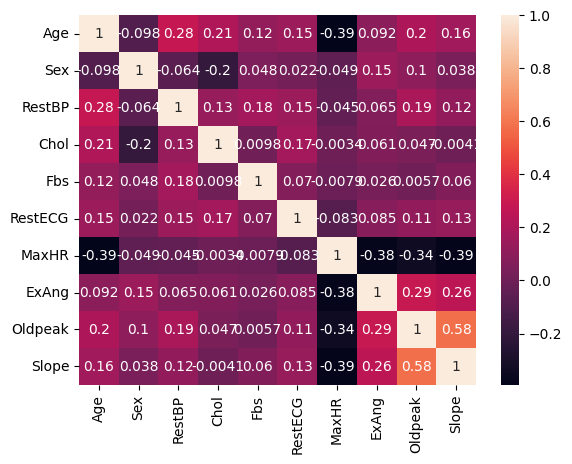

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

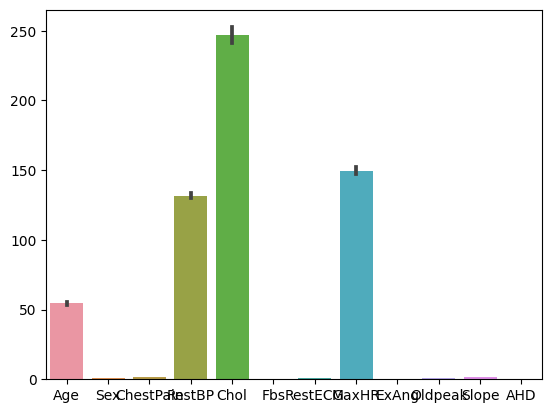

In [ ]:
sns.barplot(df)

In [ ]:
x=df.iloc[:,:-1]

In [ ]:
x.shape

(303, 11)

In [ ]:
y=df.iloc[:,-1]

In [ ]:
y.shape

(303,)

**Train Test Split**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
MinMax=MinMaxScaler()

In [ ]:
x_train=MinMax.fit_transform(x_train)

In [ ]:
x_test=MinMax.transform(x_test)

In [ ]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

**Logistic Regression**

In [ ]:
lr=LogisticRegression(solver='newton-cholesky')
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
print("Logistic Regression Accuracy Details:\n")
print("Accuracy Score :",accuracy_score(y_pred1,y_test))
print("   f1 Score    :",f1_score(y_pred1,y_test))
print("Precision Score:",precision_score(y_pred1,y_test))
print(" Recall Score  :",recall_score(y_pred1,y_test))
print('Classification Report:\n',classification_report(y_pred1,y_test))

Logistic Regression Accuracy Details:

Accuracy Score : 0.7704918032786885
   f1 Score    : 0.7666666666666666
Precision Score: 0.71875
 Recall Score  : 0.8214285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.72      0.82      0.77        28

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



**Decision Tree Classifier**

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred2=dtree.predict(x_test)
print("Decision Tree Accuracy Details:\n")
print("Accuracy Score :",accuracy_score(y_pred2,y_test))
print("   f1 Score    :",f1_score(y_pred2,y_test))
print("Precision Score:",precision_score(y_pred2,y_test))
print(" Recall Score  :",recall_score(y_pred2,y_test))
print('Classification Report:\n',classification_report(y_pred2,y_test))

Decision Tree Accuracy Details:

Accuracy Score : 0.7868852459016393
   f1 Score    : 0.8
Precision Score: 0.8125
 Recall Score  : 0.7878787878787878
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



**Random Forest Classifier**

In [ ]:
rf=RandomForestClassifier(n_estimators=135)
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)
print('Random Forest Classifier Accuracy Details \n')
print("Accuracy Score :",accuracy_score(y_pred3,y_test))
print("   f1 Score    :",f1_score(y_pred3,y_test))
print("Precision Score:",precision_score(y_pred3,y_test))
print(" Recall Score  :",recall_score(y_pred3,y_test))
print('Classification Report:\n',classification_report(y_pred3,y_test))

Random Forest Classifier Accuracy Details 

Accuracy Score : 0.8524590163934426
   f1 Score    : 0.8571428571428571
Precision Score: 0.84375
 Recall Score  : 0.8709677419354839
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**Kneighbors Classifier**

In [ ]:
np.random.seed(42)
KNC=  KNeighborsClassifier()
KNC.fit(x_train,y_train)
y_pred4=KNC.predict(x_test)
print('KNN Classifier Accuracy Details: \n')
print("Accuracy Score :",accuracy_score(y_pred4,y_test))
print("   f1 Score    :",f1_score(y_pred4,y_test))
print("Precision Score:",precision_score(y_pred4,y_test))
print(" Recall Score  :",recall_score(y_pred4,y_test))
print('Classification Report:\n',classification_report(y_pred4,y_test))

KNN Classifier Accuracy Details: 

Accuracy Score : 0.819672131147541
   f1 Score    : 0.8358208955223881
Precision Score: 0.875
 Recall Score  : 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.88      0.80      0.84        35

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



**Accuracy Performance of Each Algorithm**

In [ ]:
result=pd.DataFrame({'Model':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','KNeighbors Classifier'],'Accuracy':[recall_score(y_pred1,y_test)*100,recall_score(y_pred2,y_test)*100,recall_score(y_pred3,y_test)*100,recall_score(y_pred4,y_test)*100]})

In [ ]:
result

,Model,Accuracy
0,Logistic Regression,82.142857
1,Decision Tree Classifier,78.787879
2,Random Forest Classifier,87.096774
3,KNeighbors Classifier,80.000000
